In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp

### Esercizio 1.1

In questo esercizio dobbiamo testare il generatore di numeri casuali calcolando media, varianza e $\chi^2$ per una distribuzione uniforme (continua) su $[0, 1]$. Per il calcolo di media e varianza abbiamo usato il metodo della suddivisione in blocchi, con $100$ blocchi ciascuno contenente $1000$ estrazioni di valori dalla distribuzione; abbiamo calcolato $50000$ volte il $\chi^2$ (in modo da essere in grado di osservare con sicurezza l'accordo dell'istogranmma dei valori con la distribuzione teorica) dividendo $[0, 1]$ in 100 sottointervalli e usando per ciascuna volta $10000$ punti estratti dalla distribuzione.

Disegno i grafici della differenza di media, varianza dal valore atteso ($1/2$ e $1/12$ rispettivamente):

In [3]:
means = []
errorsMeans = []
filename = "lsn1.1_means.dat"
with open(filename, "r") as f:
    for line in f:
        mean, err = line.strip().split()
        means.append(float(mean))
        errorsMeans.append(float(err))
means = np.array(means)
errorsMeans = np.array(errorsMeans)

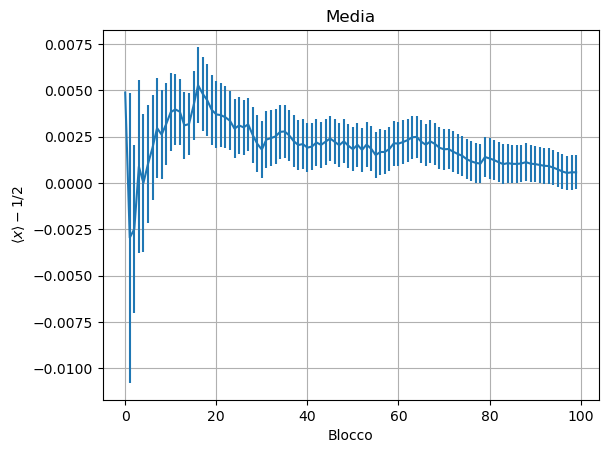

In [4]:
xs = np.arange(100)
plt.errorbar(x=xs, y=means-0.5, yerr=errorsMeans)
plt.xlabel("Blocco")
plt.ylabel(r"$\langle x \rangle - 1/2$")
plt.title("Media")
plt.grid()

In [5]:
variances = []
errorsVariances = []
filename = "lsn1.1_variances.dat"
with open(filename, "r") as f:
    for line in f:
        variance, err = line.strip().split()
        variances.append(float(variance))
        errorsVariances.append(float(err))
variances = np.array(variances)
errorsVariances = np.array(errorsVariances)

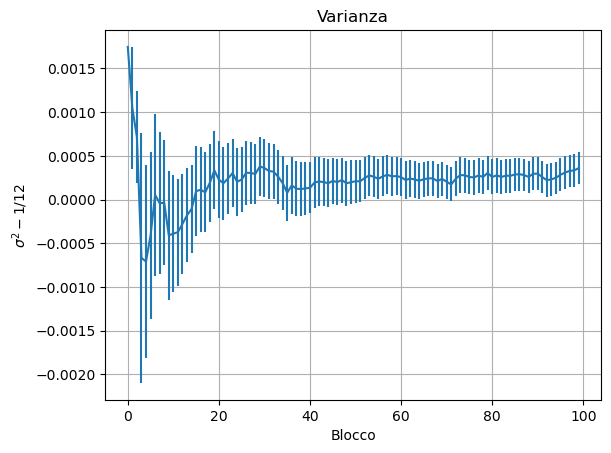

In [6]:
plt.errorbar(x=xs, y=variances-(1/12), yerr=errorsVariances)
plt.xlabel("Blocco")
plt.ylabel(r"$\sigma^2- 1/12$")
plt.title("Varianza")
plt.grid()

In entrambi i casi il valore è ragionevolmente compatibile con quello atteso.

Per il calcolo del $\chi^2$ disegno un istogramma con i valori calcolati e lo confronto con la distribuzione teorica (è noto che in questo caso essa ha $k=100-1=99$ gradi di libertà).

In [7]:
chi2s = []
with open("lsn1.1_chi2s.dat", "r") as f:
    for line in f:
        chi2s.append(float(line))

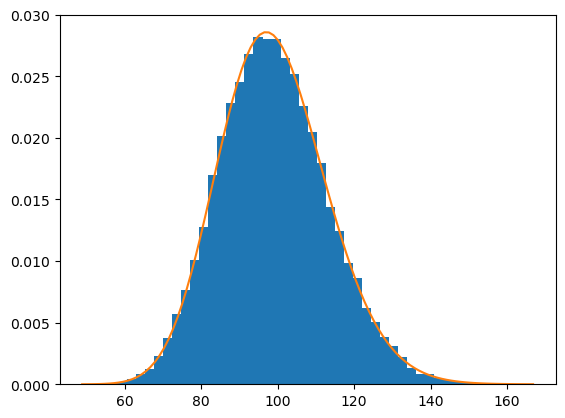

In [8]:
k = 99 #Gradi di libertà = numero di suddivisioni -1
__, bins, __ = plt.hist(chi2s, density=True, bins=50)
ys = np.linspace(bins[0], bins[-1], 100)
plt.plot(ys, sp.stats.chi2.pdf(ys, df=k))

Sembra che ci sia un buon accordo fra l'istogramma e la distribuzione teorica, segno che il nostro generatore campiona correttamente la distribuzione.

### Esercizio 1.2

In questo esercizio dobbiamo implementare metodi per campionare una distribuzione esponenziale,

$$ p(x) = \lambda \exp(-\lambda x), \quad\lambda>0, x\geq 0,$$

e una distribuzione di Cauchy-Lorentz,

$$ p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}, \quad x\in [-\infty;+\infty], \Gamma > 0$$

con il metodo dell'inversa della funzione cumulativa. In particolare per la distribuzione esponenziale la funzione cumulativa è

$$F(x) = 1-\exp(-\lambda x)$$

e la sua inversa

$$F^{-1}(x) = -\lambda\log(1-x),$$

mentre per la distribuzione di Cauchy-Lorentz la funzione cumulativa è

$$F(x) = \frac{1}{\pi}\arctan\Big(\frac{x-\mu}{\Gamma}\Big) + \frac{1}{2}$$

e la sua inversa

$$F^{-1}(x) = \mu + \Gamma\tan\bigg(\pi\bigg(x-\frac{1}{2}\bigg)\bigg)$$

Una volta implementati questi metodi dobbiamo testare il teorema del limite centrale studiando la distribuzione dei valori di $S_N= 1/N\sum_{i=1}^{N}x_i$ per le distribuzioni uniforme, esponenziale con $\lambda = 1$ e di Cauchy-Lorentz con $\Gamma = 1$, $\mu=0$, per vari valori di $N$.

#### Test dei metodi per il campionamento delle distribuzioni

Per prima cosa testiamo i metodi che abbiamo implementato generando dei dati e confrontandoli con la distribuzione corrispondente. (Questo si sarebbe potuto fare anche usando le realizzazioni di $S_1$, e quindi evitando di generare dati in più, ma volevo testare dei diversi valori dei parametri: ho usato per l'esponenziale $\lambda=0.3$ e per la Cauchy-Lorentz $\mu=0.5$, $\Gamma=1.7$.) Dobbiamo prestare attenzione alla distribuzione di Cauchy-Lorentz, che essendo "a varianza infinita" presenta _outliers,_ cioè pochi valori che sono molto diversi dal resto dei valori estratti: questi valori possono interferire con la divisione in bin dei dati per la rappresentazione dell'istogramma, portando ad avere pochi bin centrali dove risiede la maggior parte dei dati e dei bin periferici praticamente vuoti. In questo caso decidiamo di disegnare l'istogramma solo nell'intervallo $[-10, 10]$, e faremo così anche nel seguito.

Test per l'esponenziale:

In [9]:
exp = np.loadtxt("test_exp.dat", usecols=0)

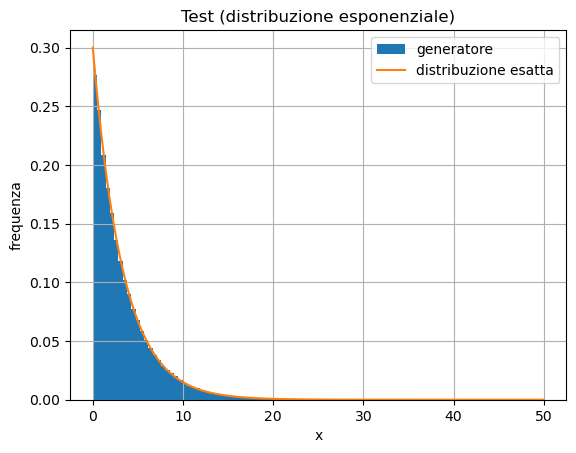

In [10]:
ys = np.linspace(0, 50, 1000)
plt.hist(exp, bins = 100, density=True, label="generatore")
plt.plot(ys, sp.stats.expon.pdf(ys, scale=1/0.3), label="distribuzione esatta")
plt.xlabel("x")
plt.ylabel("frequenza")
plt.title("Test (distribuzione esponenziale)")
plt.legend()
plt.grid()

Test per la Cauchy-Lorentz:

In [11]:
cauchy_lorentz = np.loadtxt("test_CL.dat")

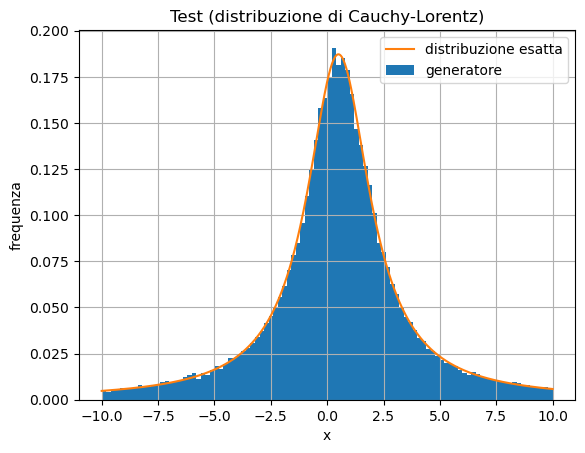

In [12]:
xs = np.linspace(-10, 10, 1000)
weight = 1/(len(cauchy_lorentz)*20/100)
plt.plot(xs, sp.stats.cauchy.pdf(xs, loc=0.5, scale=1.7), color="tab:orange", label="distribuzione esatta")
#Bisogna normalizzare l'istogramma in [-10, 10] e non su tutto l'intervallo di variabilità dei dati
hist, bins = np.histogram(cauchy_lorentz, range = (-10, 10), bins = 100, weights = len(cauchy_lorentz)*[weight])
plt.bar(bins[:-1], hist, width=20/100, align="edge", label="generatore")
plt.xlabel("x")
plt.ylabel("frequenza")
plt.title("Test (distribuzione di Cauchy-Lorentz)")
plt.grid()
plt.legend()

In entrambi i test l'accordo fra l'istogramma e la distribuzione esatta è ottimo.

#### Test del teorema del limite centrale

Ora testiamo il teorema del limite centrale disegnando istogrammi dei valori per i vari $S_N$ per ogni distribuzione, e facendo il fit del caso $N=100$ con l'appropriata distribuzione limite. Il teorema del limite centrale asserisce che nel caso della distribuzione uniforme ed esponenziale (che hanno varianza finita) per $N\to\infty$ $S_N$ è distribuito come una gaussiana. La distribuzione di Cauchy-Lorentz, invece, non ha varianza finita e quindi ad essa non si applica il teorema del limite centrale; però sappiamo che si tratta di una distribuzione stabile, e quindi ci aspettiamo che $S_N$ segua la distribuzione di Cauchy-Lorentz per ogni $N$.

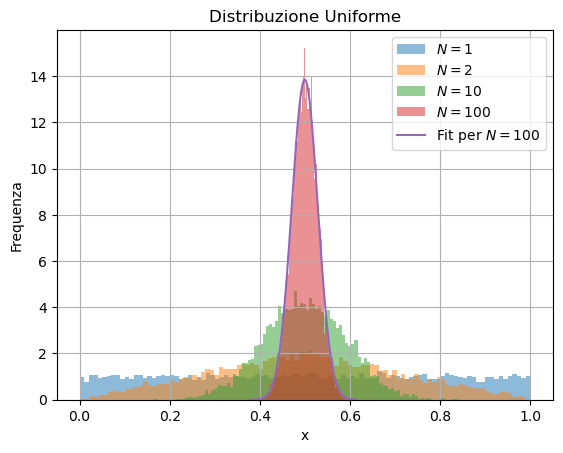

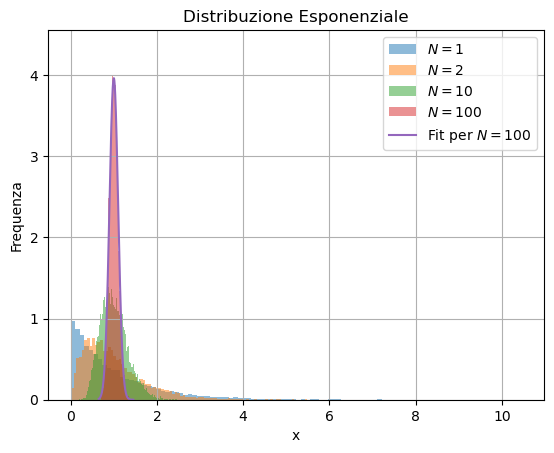

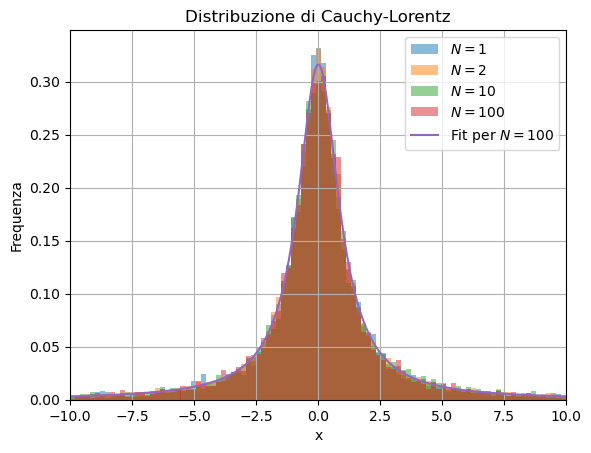

In [13]:
#(nome della distribuzione, nome del file con i dati, bin per gli istogrammi, funzione cui S_N converge via il teorerma del lim. centrale)
#Il valore dei bin della Cauchy-Lorentz è irrilevante perché non verrà usato
plots = [
    ("Uniforme", "std_die.dat", 100, sp.stats.norm),
    ("Esponenziale", "exp_die.dat", 100, sp.stats.norm),
    ("Cauchy-Lorentz", "cauchy_die.dat", 0, sp.stats.cauchy)
]

for name, filename, bins, distro in plots:
    data = np.loadtxt(filename)
    if name == "Cauchy-Lorentz":
        #I bin della Cauchy-Lorentz sono 100 in [-10, 10], più due bin esterni che comprendono gli outliers
        #e che nel grafico non saranno mostrati
        bins = np.concatenate(([data.min()], np.linspace(-10, 10, 100), [data.max()]))
    for i, N in zip(range(data.shape[-1]), [1, 2, 10, 100]):
        __, hist_bins, __ = plt.hist(data[:, i], density=True, bins=bins, alpha=0.5, label=f"$N={N}$")
    loc, scale = distro.fit(data[:, 3])
    if name == "Cauchy-Lorentz":
        xmin, xmax = 10, -10
    else:
        xmin, xmax = hist_bins[0], hist_bins[-1]
    xs = np.linspace(xmin, xmax, 1000)
    plt.plot(xs, distro.pdf(xs, loc, scale), label = "Fit per $N=100$")
    if name == "Cauchy-Lorentz":
        plt.xlim(-10, 10)
        plt.title("Distribuzione di "+name)
    else: plt.title("Distribuzione "+name)
    plt.ylabel("Frequenza")
    plt.xlabel("x")
    plt.legend()
    plt.grid()
    plt.show()

In tutti i casi $S_{100}$ sembra convergere alla distribuzione che ci aspettiamo. Notiamo anche che nel caso della Cauchy-Lorentz $S_N$ sembra essere distribuito come una Cauchy-Lorentz per ogni $N$, coerentemente con quello che ci aspettiamo.

### Esercizio 3

In questo esercizio dobbiamo calcolare $\pi$ con una simulazione dell'esperimento di Buffon.

Nell'esperimento l'"ago" (di lunghezza $L$) viene gettato su un piano (segnato con strisce parallele a distanza $d$) in maniera casuale. Interpreteremo questa prescrizione nel modo seguente: la posizione di uno degli estremi dell'ago è fissata scegliendo un punto $(x, y)$ nel piano con probabilità uniforme. La posizione del secondo estremo è poi fissata scegliendo un angolo $\theta \in[-\pi, \pi]$, sempre con probabilità uniforme. Visto che le distribuzioni da cui si estraggono $(x, y)$ e $\theta$ sono uniformi, la probabilità di intersecare una striscia non cambia se:

* si fissa l'orientazione delle strisce a piacere, e noi le prenderemo verticali;
* si assume che il secondo estremo dell'ago cada sempre a destra del primo, e quindi di scegliere $\theta \in [-\pi/2, \pi/2];$
* si fissa la coordinata $y$ della posizione del primo estremo a piacere, e noi porremo $y=0$;
* ci si restringe alla porzione di piano compresa fra tre strisce contigue, facendo cadere il primo estremo dell'ago fra le prime due e controllando se l'ago interseca quella in mezzo.

Con queste semplificazioni, un lancio dell'ago consiste in:

1. scegliere un valore $x\in[0, L)$ con probabilità uniforme per l'ascissa del primo estremo dell'ago;
2. scegliere un angolo $\theta\in[-\pi/2, \pi/2]$ con probabilità uniforme per fissare il secondo estremo dell'ago, le cui coordinate sono dunque $(x+L\cos\theta, L\sin\theta)$;
3. controllare se l'ago interseca la retta $x=d$, verificando se $x+L\cos\theta < d$.

Per selezionare un angolo in maniera uniforme fra $[-\pi/2, \pi/2]$ senza usare il valore di $\pi$ scegliamo un punto $(x, y)\in[0, 1]\times[-1, 1]$ e lo scartiamo se non è all'interno del disco unitario: quindi riscaliamo le coordinate del punto il modo che abbia distanza $L$ dall'origine e otteniamo le coordinate relative del secondo estremo dell'ago.

Abbiamo usato il data blocking per stimare gli errori, con $100$ blocchi di $10000$ "lanci" ciascuno. Disegnamo il grafico delle medie:

In [14]:
pi, error = np.loadtxt("pi.dat", unpack=True)

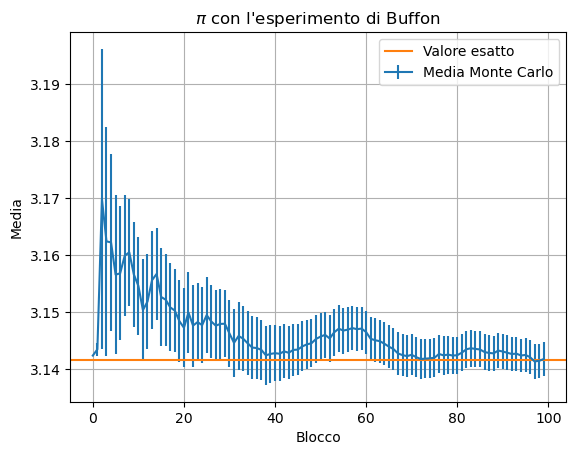

In [15]:
plt.errorbar(np.arange(100), pi, yerr=error, label="Media Monte Carlo")
plt.axhline(np.pi, color="tab:orange", label="Valore esatto")
plt.title("$\pi$ con l'esperimento di Buffon")
plt.xlabel("Blocco")
plt.ylabel("Media")
plt.grid()
plt.legend()

Il valore finale è pienamente compatibile con il vaore esatto.